<h1 style="font-size: 40px; margin-bottom: 0px;">2.1 Review and more plotting</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Today, we'll be briefly reviewing DataFrames and comparing different actions to things we can do in Excel as a visual reference to stuff that we're more familiar with. Then, we'll take some additional time to do an exercise to reinforce what we've covered last week. We'll also learn how to fine tune how our plots are displayed and learn how to make a plot commonly used to display individual data points with descriptive statistics overlayed on top.

<strong>Before we get into today's lesson, let's import the packages we'll use today:</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

One additional package we'll be using today is called seaborn. <u><a href="https://seaborn.pydata.org/" rel="noopener noreferrer" target="_blank">Documentation for seaborn is here</a></u>.

Seaborn is based on matplotlib, and it allows us to more easily go into our plots and fine tune how we want to display our data and analyses. Additionally, seaborn has some functions that allow us to generate certain plots we commonly use that can be a bit trickier to generate using just matplotlib.

You may need to update seaborn in your environment, and we'll go over how below before we get started.

First, you'll need to open up Terminal in a new Launcher window.

When terminal opens, type in the following exactly as below:
```
source activate base
```
You should see the command line now has something like below:
```
(base) jovyan@jupyter-CalNetID
```
Now type in the following to update seaborn:
```
mamba update seaborn
```
Accept the update if prompted, and seaborn should be updated to its latest version. You'll need to restart your Python kernal (top right), so that you can import the updated seaborn package by rerunning the code cell above.

<h1 style="font-size: 40px; margin-bottom: 0px;">Week 1 Review</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Let's open up our CDC_COVID_CASES.csv file for this review. We'll be making use of both this notebook, and Excel to help visualize what we're doing with the data.

In [2]:
#Import your CDC_COVID_CASES.csv file as a DataFrame
#This time you'll need specify the file path because our file is in a different directory:
COVID_all = pd.read_csv('~/MCB201B_F2024/Week_1/CDC_COVID_CASES.csv')

In [3]:
#Let's take a look to make sure that we have our DataFrame:
print(COVID_all.head())

  date_updated state  start_date    end_date  tot_cases  new_cases  \
0   01/23/2020    AK  01/16/2020  01/22/2020          0          0   
1   01/30/2020    AK  01/23/2020  01/29/2020          0          0   
2   02/06/2020    AK  01/30/2020  02/05/2020          0          0   
3   02/13/2020    AK  02/06/2020  02/12/2020          0          0   
4   02/20/2020    AK  02/13/2020  02/19/2020          0          0   

   tot_deaths  new_deaths  new_historic_cases  new_historic_deaths  
0           0           0                   0                    0  
1           0           0                   0                    0  
2           0           0                   0                    0  
3           0           0                   0                    0  
4           0           0                   0                    0  


<h2 style="font-size: 32px;">Retrieve row(s) from a DataFrame</h2>

Recall that to retrieve a row, you'll make use of the <mark style="background-color: #EEEEEE;"><strong>pandas.DataFrame.loc</strong></mark> attribute. This allows us to retrieve rows based on their assigned labels or index.
```
COVID_all.loc[865]
```

If we assigned index labels, then we could retrieve our data with the label instead using the same syntax.

In [4]:
#You can if you want change how you visually arrange your code in the code cell:
#This is just a personal choice on how you prefer to write out your code
#It doesn't have an impact on the output unless you change the syntax
print(
    'Here, output of a single row based on index value'
)

print( #broken up into multiple lines for each argument
    COVID_all.loc[865], #you can put a comment here that says row 865
    end='\n \n'#you can also put a comment here that shows two line breaks
)

print(
    'Here, output multiple rows using slice notation based on index value'
)

print(
    COVID_all.loc[865:867]
)

Here, output of a single row based on index value
date_updated           01/23/2020
state                          CA
start_date             01/16/2020
end_date               01/22/2020
tot_cases                       0
new_cases                       0
tot_deaths                      0
new_deaths                      0
new_historic_cases              0
new_historic_deaths             0
Name: 865, dtype: object
 
Here, output multiple rows using slice notation based on index value
    date_updated state  start_date    end_date  tot_cases  new_cases  \
865   01/23/2020    CA  01/16/2020  01/22/2020          0          0   
866   01/30/2020    CA  01/23/2020  01/29/2020          2          2   
867   02/06/2020    CA  01/30/2020  02/05/2020          8          6   

     tot_deaths  new_deaths  new_historic_cases  new_historic_deaths  
865           0           0                   0                    0  
866           0           0                   0                    0  
867         

<h2 style="font-size: 32px;">Retrieve column(s) from a DataFrame</h2>

Similarly, to retrieve a column, you can treat your DataFrame as if it were a dictionary.
```
COVID_all['end_date']
```

Or if your column has the default headers, you can go by the default assigned values.

In [5]:
print(
    'Here, output a single column based on label'
)

print(
    COVID_all['end_date'],
    end='\n \n'
)

print(
    'Output multiple columns based on their label',
    'by using lists',
    sep='\n'
)

print(
    COVID_all[[
        'state',
        'end_date',
        'date_updated'
    ]].head()
)

Here, output a single column based on label
0        01/22/2020
1        01/29/2020
2        02/05/2020
3        02/12/2020
4        02/19/2020
            ...    
10375    04/12/2023
10376    04/19/2023
10377    04/26/2023
10378    05/03/2023
10379    05/10/2023
Name: end_date, Length: 10380, dtype: object
 
Output multiple columns based on their label
by using lists
  state    end_date date_updated
0    AK  01/22/2020   01/23/2020
1    AK  01/29/2020   01/30/2020
2    AK  02/05/2020   02/06/2020
3    AK  02/12/2020   02/13/2020
4    AK  02/19/2020   02/20/2020


<h2 style="font-size: 32px;">Retrieve a single element from your DataFrame</h2>

Retrieving a single element is like retrieving a row first, and then from the row, retrieving a single column. So an element can be thought of as the intersection of a row and a column.
```
COVID_all.loc[865]['state']
```
You are telling Python to slice a row, and from that slice, you have Python slice it further.

In [6]:
print(
    'To pull a single element:'
)

print(
    COVID_all.loc[865]['state'],
    end='\n \n'
)

print(
    'To pull a single element in one step:'
)

print(
    COVID_all.loc[865, 'state']
)

To pull a single element:
CA
 
To pull a single element in one step:
CA


<h2 style="font-size: 32px;">Applying a filter to your DataFrame</h2>

Like with Excel, we can apply a filter to our data in order to look at only the subset of data that we're interested in. To do this in Python, you'll need to make use of conditional statements.
```
COVID_all['state'] == 'CA'
```
Let's take a look at what this conditional statement is doing in Python by breaking it down into smaller parts, and having Python print the output. This way, we can get a better idea of how Python is interpreting this statement.

In [7]:
print(
    'Have Python retrieve the information within a specific column'
)

print(
    COVID_all['state'],
    end='\n \n'
)

print(
    'Apply a conditional statement to each element of that column'
)

print(
    COVID_all['state'] == 'CA',
    end='\n \n'
)

Have Python retrieve the information within a specific column
0        AK
1        AK
2        AK
3        AK
4        AK
         ..
10375    WY
10376    WY
10377    WY
10378    WY
10379    WY
Name: state, Length: 10380, dtype: object
 
Apply a conditional statement to each element of that column
0        False
1        False
2        False
3        False
4        False
         ...  
10375    False
10376    False
10377    False
10378    False
10379    False
Name: state, Length: 10380, dtype: bool
 


So what Python is doing is going into the column we indicate, and then applying a conditional statement to each element in that column. Then, it will output a Series of Boolean values. Recall that Boolean values are the resulting output of a conditional statement.

Then, we can have Python take the resulting output and use it as a guide that tells Python what rows we want it to retrieve from our full <mark style="background-color: #EEEEEE;"><strong>COVID_all</strong></mark> dataset.
```
COVID_all.loc[COVID_all['state'] == 'CA']]
```

The <mark style="background-color: #EEEEEE;"><strong>True</strong></mark> values tell Python to retrieve that corresponding row, while the <mark style="background-color: #EEEEEE;"><strong>False</strong></mark> values will not be retrieved.

In [8]:
print(
    'Use the boolean values as a guide to pull out specific rows',
    'True means that Python will pull out a row',
    'False means that Python wont pull out a row',
    sep='\n'
)

print(
    COVID_all.loc[COVID_all['state'] == 'CA']
)

Use the boolean values as a guide to pull out specific rows
True means that Python will pull out a row
False means that Python wont pull out a row
     date_updated state  start_date    end_date  tot_cases  new_cases  \
865    01/23/2020    CA  01/16/2020  01/22/2020          0          0   
866    01/30/2020    CA  01/23/2020  01/29/2020          2          2   
867    02/06/2020    CA  01/30/2020  02/05/2020          8          6   
868    02/13/2020    CA  02/06/2020  02/12/2020         16          8   
869    02/20/2020    CA  02/13/2020  02/19/2020         30         14   
...           ...   ...         ...         ...        ...        ...   
1033   04/13/2023    CA  04/06/2023  04/12/2023   12205573      11054   
1034   04/20/2023    CA  04/13/2023  04/19/2023   12218091      12518   
1035   04/27/2023    CA  04/20/2023  04/26/2023   12230624      12533   
1036   05/04/2023    CA  04/27/2023  05/03/2023   12242634      12010   
1037   05/11/2023    CA  05/04/2023  05/10/2023   

<h2 style="font-size: 32px;">Reorganizing your DataFrame</h2>

Like in Excel, recall that you can also reorganize your data in Python.

To reorganize your rows, you can make use of the <mark style="background-color: #EEEEEE;"><strong>pandas.DataFrame.sort_values()</strong></mark> function. 
```
COVID_all.sort_values(by=['date_updated'])
```
Additional arguments allow you to control if you want to sort in ascending or descending order and indicate how you want Python to handle <mark style="background-color: #EEEEEE;"><strong>NaN</strong></mark> values (empty cells).

In [9]:
print(
    'Sort our DataFrame by the date updated column'
)

print(
    COVID_all.sort_values(by=['date_updated'])
)

Sort our DataFrame by the date updated column
     date_updated state  start_date    end_date  tot_cases  new_cases  \
6901   01/05/2023   NYC  12/29/2022  01/04/2023    3140216      22437   
3787   01/05/2023    LA  12/29/2022  01/04/2023    1521203       7090   
6728   01/05/2023    NY  12/29/2022  01/04/2023    3446004      17724   
2403   01/05/2023    GU  12/29/2022  01/04/2023      60087        161   
4825   01/05/2023    MO  12/29/2022  01/04/2023    1730256       6783   
...           ...   ...         ...         ...        ...        ...   
4720   12/31/2020    MO  12/24/2020  12/30/2020     430300      20927   
9910   12/31/2020    WI  12/24/2020  12/30/2020     516226      15782   
49     12/31/2020    AK  12/24/2020  12/30/2020      45802       1724   
3509   12/31/2020    KY  12/24/2020  12/30/2020     264829      14773   
1260   12/31/2020    CT  12/24/2020  12/30/2020     183663      12958   

      tot_deaths  new_deaths  new_historic_cases  new_historic_deaths  
6901 

To reorganize columns, you can pass a list of your reorganized columns when you have Python retrieve columns from your dataset. This also lets you simultaneously select which columns you want if you only want a subset of them.
```
COVID_all[['state', 'start_date', 'end_date', 'date_updated', 'new_cases']]
```

In [10]:
print(
    'Reorganize our columns by specifying the order in which Python pulls columns',
    'from our original DataFrame',
    sep='\n'
)

print(COVID_all[[
    'state',
    'start_date',
    'end_date',
    'date_updated',
    'new_cases'
]])

Reorganize our columns by specifying the order in which Python pulls columns
from our original DataFrame
      state  start_date    end_date date_updated  new_cases
0        AK  01/16/2020  01/22/2020   01/23/2020          0
1        AK  01/23/2020  01/29/2020   01/30/2020          0
2        AK  01/30/2020  02/05/2020   02/06/2020          0
3        AK  02/06/2020  02/12/2020   02/13/2020          0
4        AK  02/13/2020  02/19/2020   02/20/2020          0
...     ...         ...         ...          ...        ...
10375    WY  04/06/2023  04/12/2023   04/13/2023        158
10376    WY  04/13/2023  04/19/2023   04/20/2023        115
10377    WY  04/20/2023  04/26/2023   04/27/2023        140
10378    WY  04/27/2023  05/03/2023   05/04/2023        129
10379    WY  05/04/2023  05/10/2023   05/11/2023        366

[10380 rows x 5 columns]


<h1 style="font-size: 40px; margin-bottom: 0px;">In-class exercise #1</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Recall from MCB201A Experiment 10, we used a spectrophotometer to measure the absorbances of a set of BSA dilutions in order to generate a standard curve. In this exercise, you'll practice working with DataFrames and performing operations on them. Then, you'll plot the resulting dataset in a scatterplot using matplotlib's <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.plot()</strong></mark> function with one additional argument to specify how you want your line plot to look. 

Alternatively, you can also use the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.scatter()</strong></mark> function. <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html" rel="noopener noreferrer" target="_blank">Documentation for that is here</a></u>. 

Although we won't generate a regression curve, the raw data of absorbances provides a simple dataset to practice playing with datasets in Python.

I'll walk around as you work through this exercise to see how everyone is doing and to answer questions.

<h2>1. Tidy up Excel spreadsheet</h2>

First, we'll tidy up our raw data to make it easier for us to work with in Python. You can do this in Excel and just use the absorbances for the standards. No need to worry about your samples or a RIPA blank for this exercise.

You can try to create a new Excel or CSV file that resembles something like the below:

<table style="margin-left: 0px;">
    <tr>
        <th style="background-color: none; border-left: none; border-top: none; width: 75px;">&nbsp;</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">2</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">1.5</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">1</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0.75</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0.5</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0.25</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0.125</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0.025</th>
        <th style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px;">0</th>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; "><strong>rep_1</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; "><strong>rep_2</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000;">&nbsp;</td>
    </tr></table>

<h2>2. Import spreadsheet into notebook</h2>

Upload your Excel or CSV file to your directory for this week, and then you can import the file into this notebook.

If you saved as an .xlsx file, then you'll want to make use of the <mark style="background-color: #EEEEEE;"><strong>pandas.read_excel()</strong></mark> function.

If you saved as an .csv file, then you'll use the <mark style="background-color: #EEEEEE;"><strong>pandas.read_csv()</strong></mark> function.

Since our spreadsheet contains row and column labels, we'll pass additional arguments through the function.
```
index_col=0
```
By including this argument, you tell Python that your spreadsheet contains row labels in the first column (position 0)

```
header=0
```
By including this argument, you tell Python that the first row (position 0) contains your header labels.

Remember that you'll want to separate each parameter with a comma when you call up the function.

In [12]:
raw_absorbances = pd.read_csv('BSA_ABSORBANCES.csv', index_col=0, header=0) #remember that when you pass arguments to a function, it should be in the parentheses

print(raw_absorbances.head())

            2     1.5       1    0.75     0.5    0.25   0.125   0.025       0
rep_1  2.7136  2.2621  1.6385  1.3747  1.0493  0.7043  0.5296  0.3943  0.3834
rep_2  2.6848  2.2493  1.7027  1.3523  1.0900  0.7079  0.5490  0.3867  0.3576


<h2>3. Calculate mean absorbances</h2>

Once we have our dataset imported, let's calculate the mean values using the <mark style="background-color: #EEEEEE;"><strong>DataFrame.mean()</strong></mark> function (and if you want, save it as another DataFrame). We can tell Python that we want to take the average for each column by specifying the axis on which the operation will be performed.
```
DataFrame.mean(axis=0)
```

In [13]:
mean_absorbances = raw_absorbances.mean(axis=0)

print(mean_absorbances)

print(type(mean_absorbances))

mean_abs_df = pd.DataFrame(mean_absorbances).transpose() #this will get  you a dataframe similar to what we imported

print(mean_abs_df)
print(type(mean_abs_df))

2        2.69920
1.5      2.25570
1        1.67060
0.75     1.36350
0.5      1.06965
0.25     0.70610
0.125    0.53930
0.025    0.39050
0        0.37050
dtype: float64
<class 'pandas.core.series.Series'>
        2     1.5       1    0.75      0.5    0.25   0.125   0.025       0
0  2.6992  2.2557  1.6706  1.3635  1.06965  0.7061  0.5393  0.3905  0.3705
<class 'pandas.core.frame.DataFrame'>


Print out your mean absorbances. What do you notice about the data? What type of data is it? Are there additional things you should do before you can use this output?

<h2>4. Correct for background absorbance</h2>

This is where some of your approaches may differ. You'll see that there are multiple ways to do something depending on how you set up your data prior to this.

<strong>If you created a DataFrame for your mean absorbances:</strong></br>
You can take the mean background (0 mg/ml BSA) and subtract that from your <mark style="background-color: #EEEEEE;"><strong>absorbance_mean</strong></mark> to get <mark style="background-color: #EEEEEE;"><strong>corrected_mean_abs</strong></mark>. We'll have to make use of the pandas.DataFrame.sub() function.
```
corrected_mean_abs = absorbance_mean.sub(absorbance_mean['0'], axis=0)
```

<strong>If you kept your mean absorbances as a pandas Series:</strong></br>
You can take the mean background and subtract that from each element.
```
corrected_mean_abs = absorbance_mean - absorbance_mean.loc['0']
```

In [15]:
#since we're working with a dataframe:
corrected_mean_abs = mean_abs_df.sub(mean_abs_df['0'], axis=0)

#Check to see if things look right:
print(corrected_mean_abs)

#we can also check our object type
print(type(corrected_mean_abs))

#let's see what object type our column labels are
print(corrected_mean_abs.columns)
print(type(corrected_mean_abs.columns[0]))

#since they're strings, they hold no numerical value, so we need to convert them to int or float before we plot

        2     1.5       1   0.75      0.5    0.25   0.125  0.025    0
0  2.3287  1.8852  1.3001  0.993  0.69915  0.3356  0.1688   0.02  0.0
<class 'pandas.core.frame.DataFrame'>
Index(['2', '1.5', '1', '0.75', '0.5', '0.25', '0.125', '0.025', '0'], dtype='object')
<class 'str'>


<h2>5. Plot your corrected mean absorbance values</h2>

Now let's prepare to plot our data. We want Python to understand that there's a specific concentration associated with each column, so we can replace the labels with actual numbers.

<strong>If you are working with a DataFrame:</strong></br>
You'll be changing your column headers, so will need to pass your argument through the <mark style="background-color: #EEEEEE;"><strong>columns</strong></mark> parameter. Don't forget that you can treat this change as if you were pairing things together in a dictionary, so you'll be using dictionary-like syntax. You're essentially mapping a new value to your old label in order to update it.
```
DataFrame.rename(columns={'key1': float1, 'key2': float2, ...})
```

<strong>If you are working with a Series:</strong></br>
You'll instead be changing your index labels with the same function and same dictionary-like syntax, but you don't need to specify index or columns, since Series are one-dimensional.
```
Series.rename({'key1': float1, 'key2': float2, ...})
```

In [16]:
#You can rename each column one by one:
updated_df = corrected_mean_abs.rename(columns={'2':2.0, 
                                                '1.5':1.5, 
                                                '1': 1.0, 
                                                '0.75': 0.75, 
                                                '0.5': 0.5,
                                                '0.25': 0.25,
                                                '0.125':0.125,
                                                '0.025':0.025,
                                                '0':0})

print(updated_df)

print(type(updated_df.columns[0]))

#Or in our case you can pull out the columns and convert them to numeric
updated_header = pd.to_numeric(corrected_mean_abs.columns)

#You can also reassign the converted headers back
corrected_mean_abs.columns = updated_header

print(corrected_mean_abs)

    2.000   1.500   1.000  0.750    0.500   0.250   0.125  0.025  0.000
0  2.3287  1.8852  1.3001  0.993  0.69915  0.3356  0.1688   0.02    0.0
<class 'numpy.float64'>
    2.000   1.500   1.000  0.750    0.500   0.250   0.125  0.025  0.000
0  2.3287  1.8852  1.3001  0.993  0.69915  0.3356  0.1688   0.02    0.0


Now, let's create a scatter plot our data points using column headers for the x-axis values with the <mark style="background-color: #EEEEEE;"><strong>pandas.DataFrame.columns</strong></mark> attribute.

In this case, since we want our markers to be dots, we can pass an additional argument through the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.plot()</strong></mark> function after we have specified our x-values and our y-values. The additional argument will be <mark style="background-color: #EEEEEE;"><strong>'o'</strong></mark>.

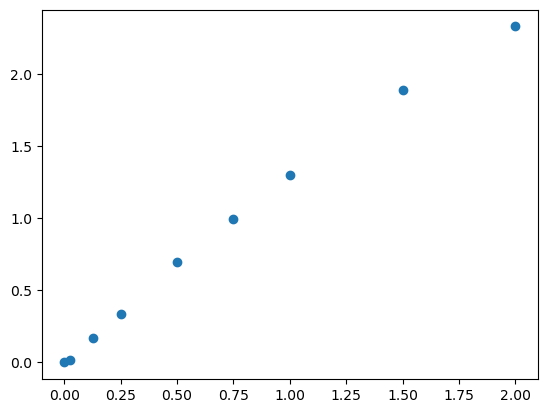

In [17]:
#Multiple ways to plot depending on how you set it up
plt.plot(updated_header, updated_df.loc[0], 'o')

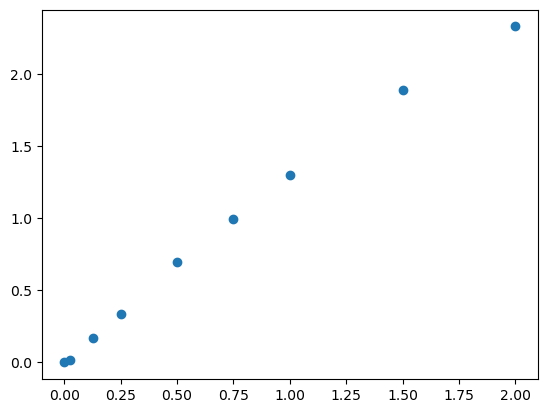

In [22]:
#or
plt.plot(corrected_mean_abs.columns, corrected_mean_abs.loc[0], 'o')

Or if you used a Series:

<class 'pandas.core.series.Series'>


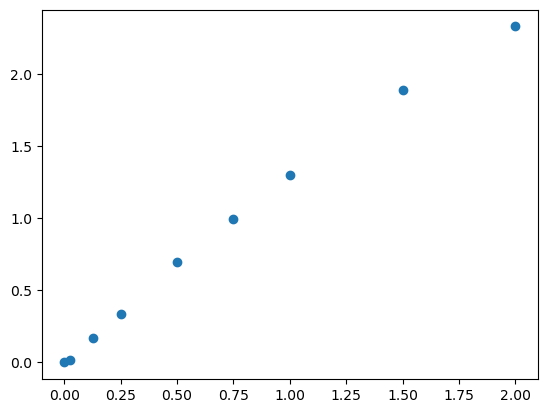

In [27]:
#You can just input your series for the data without needing to specify x or y values as long as your index values are numbers
plt.plot(corrected_mean_abs.loc[0], 'o')
#Check type
print(type(corrected_mean_abs.loc[0]))

<h1 style="font-size: 40px; margin-bottom: 0px;">In-class exercise #2</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

For this exercise, we'll be creating a fake dataset to use as an example for our later plotting demonstration. 

This exercise will also help reinforce what we've learned in Week 1.

<h2>1. Create a list of cell counts for 50 control samples</h2>

First, let's create some fake control data with sufficient sample numbers for this exercise. We'll use the function <mark style="background-color: #EEEEEE;"><strong>numpy.random.randint()</strong></mark> to generate an array of random integers, which will be our cell counts. This function is similar to the <mark style="background-color: #EEEEEE;"><strong>numpy.random.rand()</strong></mark> function, but it generates integers, and we can specify a range in which the integers will fall.
```
numpy.random.randint(low, high=None, size=None, dtype=int)
```
Breaking down the function's parameters:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>low</strong></mark> - This specifies the lowest possible integer that can be drawn</li>
    <li><mark style="background-color: #EEEEEE;"><strong>high</strong></mark> - This specifies the highest possible integer that can be drawn. Default is no upper bound</li>
    <li><mark style="background-color: #EEEEEE;"><strong>size</strong></mark> - This specifies the shape of the output array</li>
    <li><mark style="background-color: #EEEEEE;"><strong>dtype</strong></mark> - This specifies the dtype of the elements</li>
</ul>

<h2>2. Create a list of cell counts for 50 TAZ KO samples</h2>

Let's do the same for some fake TAZ KO samples.

<h2>3. Create a DataFrame from our two lists</h2>

Now, let's create a DataFrame from our two lists and update the column headers, so we can use it for today's plotting demonstration.

<h1 style="font-size: 40px; margin-bottom: 0px;">In-class plotting demo</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Now that we have our fake dataset, let's dive into more plotting for additional practice and to learn how to fine tune our plots some more.

<h2>Setting up to fine tune figures and plots</h2>

To allow us to have more control over how we are plotting, to access specific attributes of our plots, and to create figures containing subplots, we can make use of the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function.

So the first line of code that we'll implement in this demo is:
```
fig, ax = plt.subplots()
```
The <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function returns a <mark style="background-color: #EEEEEE;"><strong>fig</strong></mark> and <mark style="background-color: #EEEEEE;"><strong>ax</strong></mark>, which we can assign to similarly named variables, allowing us to modify specific parts of our plots.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html" rel="noopener noreferrer" target="_blank"><u>Click for documentation for the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function</u></a>.

In the code cell below, mess around with the parameters to see how the output figure changes.

You should be able to see that we have empty plots, and by changing parameters around, we can change how the figure looks.

<h2>Prepare a color palette</h2>

We have the freedom to also select the specific color for our data points, and to prepare for this, we can create a list containing strings of color codes.

<h2>Create a swarmplot</h2>

Matplotlib's ability to create a swarmplot is a bit more limited, so we can make use of our seaborn package, which has a function for us to create a swarmplot. Swarmplots are helpful when you want to show each individual data point, so that the reader has an idea of how the distribution of your data looks by looking directly at the raw data points.

The function that we'll use is the <mark style="background-color: #EEEEEE;"><strong>seaborn.swarmplot()</strong></mark> function. <u><a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

We'll pass our DataFrame through the function to see how it looks like without additional modifications.
```
sns.swarmplot(data=cell_counts)

We can make minor adjustments by passing additional arguments to the function, such as:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>s</strong></mark> - the size of our markers</li>
    <li><mark style="background-color: #EEEEEE;"><strong>palette</strong></mark> - color palette for our markers</li>
</ul>

You can see that we have the basic swarm plot, but as with our basic plot from last week, there's still a few things missing, such as proper labels for our groups on the X-axis, a Y-axis label, and proper Y-axis limits. Usually, swarmplots also include descriptive statistics that summarize the raw data that is shown, and this can include the mean and error bars denoting the standard deviation or standard error.

Before we start adjusting the axes, let's add in our descriptive statistics overlaid on top of our raw data points.

<h2>Overlay descriptive statistics</h2>

One thing we can do is to overlay plots on top of one another to convey additional information within a single plot without having to create subplots for each thing. This type of approach is helpful when we want to overlay descriptive statistics over our raw data points, so that the reader can see both the raw data as well as the statistics.

Descriptive statistics, such as the mean, can be plotted a few ways, such as a bar graph with error bars or as box-and-whisker plots. Both of these plots contain something that will be helpful to overlay onto our swarmplot. For the bar graph, it contains error bars, and for the box-and-whisker plot, it contains the ability to plot just the mean.

So what we can do is to take the portions of these plots that we like, strip away what we don't want to see, and overlay it onto our swarmplot.

Let's take a look at how these two plots will look like when plotted as a basic function.

<h3>Plot a bar graph to overlay</h3>

We can make use of the <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function and pass our DataFrame to the function to plot. 

<u><a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

You should see a pretty basic bar graph with error bars already plotted. It has what we need, but now we need to strip out the parts that we don't by passing additional arguments through it.

Specifically, we want just the error bars, so we can make use of the following parameters:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>data</strong></mark> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><mark style="background-color: #EEEEEE;"><strong>estimator</strong></mark> - we want it to plot the mean since we want our error bars to be centered around the mean of our data. We can pass the <mark style="background-color: #EEEEEE;"><strong>np.mean</strong></mark> function to this parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>alpha</strong></mark> - the parameter controlling the opacity of the boxplot bars. By changing this to <mark style="background-color: #EEEEEE;"><strong>0</strong></mark>, we basically hide the bars depicting the mean, leaving only the error bars visisble</li>
    <li><mark style="background-color: #EEEEEE;"><strong>errorbar</strong></mark> - by changing this parameter, we can tell Python if we want our error bars to denote standard deviation or standard error</li>
    <li><mark style="background-color: #EEEEEE;"><strong>capsize</strong></mark> - the horizontal length of our error bars. This also tells Python that we want a horizontal cap (compare to previously, where there was no cap)</li>
    <li><mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to further fine tune our plot by mapping the key:value pairs we provide to specific parameters that exist for <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.boxplot()</strong></mark></a></u>. Click function for documentation.</li>
</ul>

So let's work through each parameter one at a time to see how each change alters our bar plot.

<h4>Define the estimator</h4>

You can see nothing is changed because by default, the <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function will plot the mean by default.

<h4>Change the opacity to hide the bars</h4>

The only things showing now are the error bars, and the error bars need further refining so that we have them denote either the standar deviation or the standard error.

<h4>Update what the error bars denote</h4>

<h4>Add caps to error bars</h4>

<h4>Further refine error bars</h4>

<h4>Now let's look at all the plots together on one figure.</h4>

So now our error bars look good, and let's use the box-and-whisker plot to get a horizontal line denoting the means of our data.

<h3>Plot a box-and-whisker plot to overlay</h3>

We'll do something similar for a box-and-whisker plot to get it to just show a horizontal line for our means.

We can use the <mark style="background-color: #EEEEEE;"><strong>seaborn.boxplot()</strong></mark> function and pass our same DataFrame to it to plot.

<u><a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

Here, you should see a basic box-and-whisker plot. We're going to make adjustments to the plot so that it shows just the mean, so we can use it as an overlay on top of our swarmplot.

Like with our bar plot, we can make use of the following parameters to just get what we need the plot to depict:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>data</strong></mark> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showmeans</strong></mark> - we want it to plot the mean</li>
    <li><mark style="background-color: #EEEEEE;"><strong>meanline</strong></mark> - we want it to plot a horizontal line for the mean that spans the width of the box of our box-and-whisker plot</li>
    <li><mark style="background-color: #EEEEEE;"><strong>width</strong></mark> - defines the width of our box and therefore also defines the horizontal span of our mean line</li>
    <li><mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to refine how we want the mean line to look. Like with <mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> for the bar plot, the key:value pairs will be passed to <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.boxplot()</strong></mark></a></u></li>
    <li><mark style="background-color: #EEEEEE;"><strong>medianprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to remove the median line of our box-and-whisker plot. Works like the <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>whiskerprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to remove the whiskers of our box-and-whisker plot. Also works like the <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showfliers</strong></mark> - we can indicate with a Boolean, whether or not we want to hide outliers (fliers)</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showbox</strong></mark> - we can indicate with a Boolean, whether or not we want to hide the box of our box-and-whisker plot</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showcaps</strong></mark> - we can indicate with a Boolean, whether or not we want to the caps</li>
</ul>

Now if we go through each argument and see how the resulting box-and-whisker plot is altered with each parameter:

<h4>Show the mean</h4>

It might be hard to see, but you can see a green triangle representing the mean value for each of our two groups. However, we want our mean to be a horizontal line, so we adjust this with the next parameter.

<h4>Create a horizontal mean line</h4>

This is probably still hard to see, but there is now a green dashed line that denotes where our mean values are. It spans the full width of the box, but we can shorten the length of the line by reducing the width of our boxes.

<h4>Shorten the length of the mean line</h4>

<h4>Refine the mean line</h4>

Now the mean line is more clearly depicted, but there are still other parts of the box-and-whisker plot that we don't want.

<h4>Remove median line</h4>

Now that we've removed the median line, we can clearly see the mean line.

<h4>Remove whiskers</h4>

<h4>Remove outliers (fliers)</h4>

We're not removing outliers from our dataset, only hiding them in the box-and-whisker plot.

Now we're left with the mean line, caps, and the box (which denotes the interquatile range). So all that's left is to remove the box and to remove the caps.

<h4>Remove the box</h4>

<h4>Remove the caps</h4>

<h4>Now let's look at all the plots together on one figure.</h4>

<h3>Look at all three of our plots side by side</h3>

<h3>Now overlay our plots onto our swarmplot</h3>

<h4>Re-order the sequence that plots are overlaid</h4>

You can see that our swarmplot is overlaid on top of our descriptive statistics, so we need to change the order in which each plot appears, so that our descriptive statistics are on top. We can do this by passing a <mark style="background-color: #EEEEEE;"><strong>zorder</strong></mark> parameter to our swarmplot to move it under everything else.

<h2>Update labels</h2>

Now our plot is looking much nicer and more like a publication quality figure. However, we still need to update the labels and axis titles!

Since our plot set up is slightly different, we'll pull from slightly different attributes to define what our titles and axes labels will be. The concept is still the same as before, but the exact attribute we're calling is different.

For example, last week we made use of <mark style="background-color: #EEEEEE;"><strong>plt.ylabel()</strong></mark> to change the title of our Y-axis. This time, we can make use of <mark style="background-color: #EEEEEE;"><strong>ax.set_ylabel()</strong></mark> to change the Y-axis title. They both function the same, but since the set-up is slightly different, we'll need to change which attribute we're calling for certain properties.

<h4>Update Y-axis title</h4>

<h4>Update X-axis ticks and tick labels</h4>

We could go back into our data columns and update the header there, which will update the header for our plot. But we can update the X-axis tick labels without needing to go way back into our code.

We will first define our X-axis positions using a list of integers, and then define the labels using the <mark style="background-color: #EEEEEE;"><strong>labels</strong></mark> parameter.
```
ax.set_xticks([0, 1], labels=['Control', '$TAZ$ KO'])
```
Since we have two groups, our list will just consist of 0 and 1, since that's where our two groups are plotted in all our plots, and our list of labels will be at their respective positions. The text flanked by $ will become italicized in the figure.

We can also make use of <mark style="background-color: #EEEEEE;"><strong>plt.xticks()</strong></mark> to adjust the rotation and text alignment.

<h2>Setting figure size and resolution</h2>

We have two ways of setting figure size, either at the onset when we first use the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function, or we can specifically update the figure attribute using <mark style="background-color: #EEEEEE;"><strong>fig.set_size_inches()</strong></mark> function. <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.set_size_inches.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

We can also improve the resolution of our figure, so it will look good in posters (which have to be blown up to a large size). To do this, we can use the <mark style="background-color: #EEEEEE;"><strong>fig.set_dpi()</strong></mark> function. <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.set_dpi.html#matplotlib.figure.Figure.set_dpi" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

<h2>Despine</h2>

One of the benefits of using seaborn is that we can in a single line remove the spines of our plots.
```
sns.despine()
```

<h1 style="font-size: 40px; margin-bottom: 0px;">Exporting your plot</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Now that you have a publication quality plot that you want to include into your paper, grant, or presentation, you can export it as a PDF.
```
fig.savefig('Control_v_TAZ_KO_cell_counts.pdf', bbox_inches="tight")
```